In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('ready_data.csv', index_col='date', parse_dates=True)
df.head()

,bhp,bht,dp_tubing,thp,tht,choke_size_percentage,QL,QG
date,,,,,,,,
2008-02-14,295.586061,105.775486,181.867887,113.718175,72.737631,80.120465,3333.600000,543951.872000
2008-02-15,297.662702,105.751875,180.832060,116.830642,69.995943,84.250990,2705.053996,397504.971058
2008-02-16,295.935519,105.811114,180.501045,115.434474,71.518347,82.359026,3056.690000,418474.000000
2008-02-17,295.551657,105.831299,180.345781,115.205876,73.641800,82.168501,2984.480000,422763.000000
2008-02-18,294.211063,105.866467,180.929248,113.281815,74.160157,80.263045,3116.869565,431823.652174


In [4]:
last_1day, last_2day = df.shift(+1), df.shift(+2)

last_1day.rename(columns={
        'bhp' : '1last_bhp',
        'bht' : '1last_bht',
        'dp_tubing' : '1last_dp_tubing',
        'AVG_CHOKE_SIZE_P' : '1last_AVG_CHOKE_SIZE_P',
        'thp' : '1last_thp',
        'tht' : "1last_tht",
        "choke_size_percentage" : "1last_choke_size_percentage",
        "QL" : "1last_QL",
        "QG" : "1last_QG"
}, inplace=True)

last_2day.rename(columns={
    'bhp' : '2last_bhp',
    'bht' : '2last_bht',
    'dp_tubing' : '2last_dp_tubing',
    'AVG_CHOKE_SIZE_P' : '2last_AVG_CHOKE_SIZE_P',
    'thp' : '2last_thp',
    'tht' : "2last_tht",
    "choke_size_percentage" : "2last_choke_size_percentage",
    "QL" : "2last_QL",
    "QG" : "2last_QG"
    },inplace=True)

df = pd.concat([df, last_1day, last_2day], axis=1)
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3052 entries, 2008-02-16 to 2016-09-17
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bhp                          3052 non-null   float64
 1   bht                          3052 non-null   float64
 2   dp_tubing                    3052 non-null   float64
 3   thp                          3052 non-null   float64
 4   tht                          3052 non-null   float64
 5   choke_size_percentage        3052 non-null   float64
 6   QL                           3052 non-null   float64
 7   QG                           3052 non-null   float64
 8   1last_bhp                    3052 non-null   float64
 9   1last_bht                    3052 non-null   float64
 10  1last_dp_tubing              3052 non-null   float64
 11  1last_thp                    3052 non-null   float64
 12  1last_tht                    3052 non-null   float64
 13  

In [11]:
y = df['QL']
X = df.drop(["QL", "QG"], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X, X_b, y, y_b = train_test_split(X, y, train_size=0.1, random_state=42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_b = ss.transform(X_b)

c:\Program Files\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [20]:
X_train.shape

(61, 22)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [39]:
model = Sequential()
model.add(Dense(61, input_shape=(X_train.shape[1:]), activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='gelu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [40]:
history = model.fit(X,y, epochs=460, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/460
4/4 [==============================] - 2s 93ms/step - loss: 3931.2463 - val_loss: 3917.3860
Epoch 2/460
4/4 [==============================] - 0s 15ms/step - loss: 3931.1934 - val_loss: 3917.3374
Epoch 3/460
4/4 [==============================] - 0s 16ms/step - loss: 3931.1816 - val_loss: 3917.2969
Epoch 4/460
4/4 [==============================] - 0s 15ms/step - loss: 3931.1963 - val_loss: 3917.2544
Epoch 5/460
4/4 [==============================] - 0s 14ms/step - loss: 3931.1704 - val_loss: 3917.2175
Epoch 6/460
4/4 [==============================] - 0s 14ms/step - loss: 3931.1128 - val_loss: 3917.1787
Epoch 7/460
4/4 [==============================] - 0s 16ms/step - loss: 3931.1165 - val_loss: 3917.1487
Epoch 8/460
4/4 [==============================] - 0s 26ms/step - loss: 3931.0942 - val_loss: 3917.1174
Epoch 9/460
4/4 [==============================] - 0s 53ms/step - loss: 3931.0439 - val_loss: 3917.0850
Epoch 10/460
4/4 [==============================] - 0s 18ms/step

In [41]:
y_test.var()

3818163.5019510495

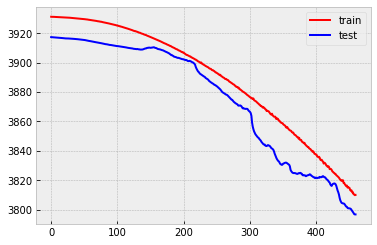

In [42]:
plt.plot(history.history['loss'], color='red', label='train')
plt.legend()
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()

In [43]:
y_pred = model.predict(X_b)

86/86 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(y_b, y_pred))
print(mean_absolute_error(y_b, y_pred))

-3.9989649790144597
3767.562720567643


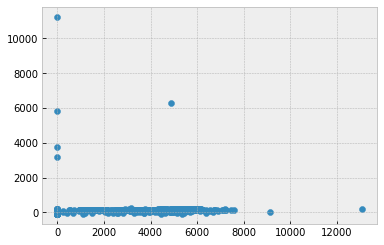

In [46]:
plt.scatter(y_b, y_pred)

In [67]:
# d = {'y_pred' : y_pred.T, 'y_b' : y_b.T}
blind_df = pd.DataFrame()
blind_df['y_b'] = y_b
blind_df['y_pred'] = y_pred


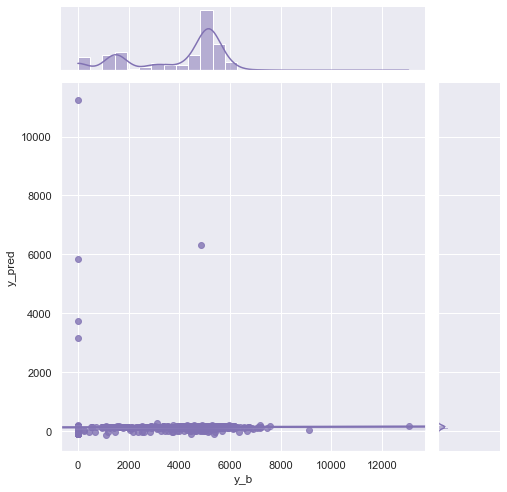

In [69]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="y_b", y="y_pred", data=blind_df,
                  kind="reg", truncate=False,
                 
                  color="m", height=7)